# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

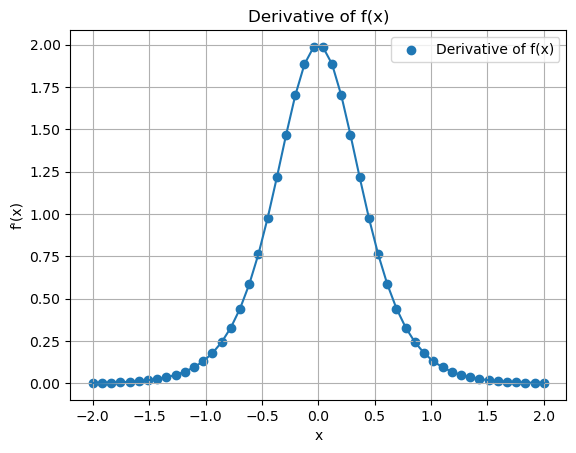

In [ ]:
# code and me hitrue
import numpy as np
import matplotlib.pyplot as plt

def f(x): #the function as given in the problem
    return 1 + (1 / 2) + np.tanh(2 * x)

def deriv(point, delta): #derivative using the central difference method
    ans = (f(point + delta / 2) - f(point - delta / 2)) / delta
    return ans

def analytic_deriv(x): #analytic solution
    return 2 * (1 / (np.cosh(2 * x))**2) #since numpy does not have hyoerbolic secant

x_values = np.linspace(-2, 2, 50)
y_values = [deriv(x, 0.01) for x in x_values]
analytic_y_values = [analytic_deriv(x) for x in x_values]


plt.scatter(x_values, y_values, label='Derivative of f(x)') #Graphing points from central difference derivative
plt.plot(x_values, analytic_y_values) #Graphing the (true) analytics solution
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('Derivative of f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(7)

With a small enough value for 'h', the central differences method for the derivative is equivalent to the analytic solution of the derivative

#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

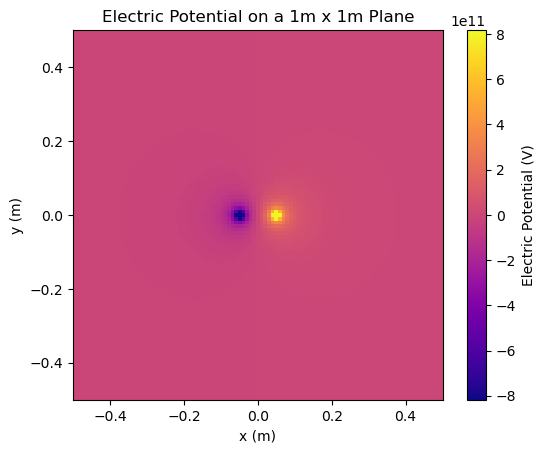

In [24]:
#code
q = 1 
epsilon = 8.85e-12 
dist = 0.1 # Distance between charges in meters
grid_space = 0.01  # Grid spacing, also in meters

# Let's create a grid of points using np.meshgrid!
x = np.arange(-0.5, 0.5 + grid_space, grid_space)
y = np.arange(-0.5, 0.5 + grid_space, grid_space)
X, Y = np.meshgrid(x, y)

# Positions of our charges - both positive and negative
pos_pluscharge = (dist / 2, 0)
pos_negcharge = (-dist / 2, 0)

    
# Calculating the potential at each point
def potential(x, y, q, pos):
    r = np.sqrt((x - pos[0])**2 + (y - pos[1])**2)
    r = np.where(r < 0.01, 0.01, r)  # Avoiding division by small values
    return q / (4 * np.pi * epsilon * r)
   
    # Below is my initial attempt at introducing a softening parameter - it was causing issues in the subsequent problem...
    # if np.any(r < 0.01):
    #     r[r < 0.01] = 0.01
    # return q / (4 * np.pi * epsilon * r)

V = potential(X, Y, q, pos_pluscharge) - potential(X, Y, q, pos_negcharge)

# Visual of the charges and the electric potential using np.imshow
plt.imshow(V, extent=(-0.5, 0.5, -0.5, 0.5), origin='lower', cmap='plasma')
plt.colorbar(label='Electric Potential (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Potential on a 1m x 1m Plane')
plt.show()

Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

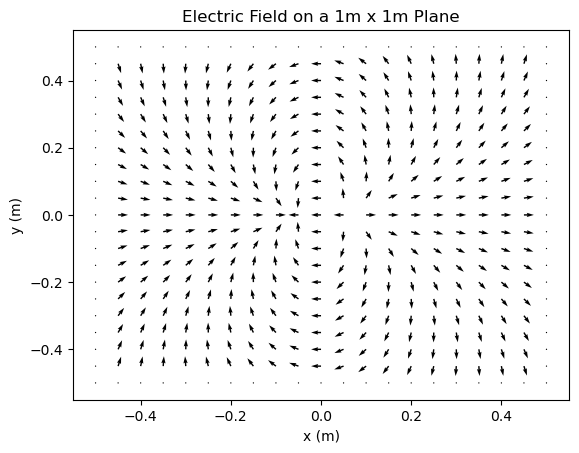

In [ ]:

q = 1 
epsilon = 8.85e-12 
dist = 0.1 # Distance between charges in meters
grid_space = 0.05  # Grid spacing, also in meters

# Let's create a grid of points using np.meshgrid!
x = np.arange(-0.5, 0.5 + grid_space, grid_space)
y = np.arange(-0.5, 0.5 + grid_space, grid_space)
X, Y = np.meshgrid(x, y)


V = np.zeros_like(X) # Creates an array of zeros with the same shape and type as the original

for i in range(X.shape[0]): # Number of rows
    for j in range(X.shape[1]): # Nuumber of columns
        # Potential is given by the following
        V[i, j] = potential(X[i, j], Y[i, j], q, pos_pluscharge) - potential(X[i, j], Y[i, j], q, pos_negcharge)

# Manually computing the electric field components using central differences
Ex = np.zeros_like(V)
Ey = np.zeros_like(V)
h = 0.1

for i in range(1, V.shape[0] - 1):
    for j in range(1, V.shape[1] - 1):
        
        
        Ex[i, j] = -(V[i + 1, j] - V[i - 1, j]) / (h)
        Ey[i, j] = -(V[i, j + 1] - V[i, j - 1]) / (h)
        
        #put in if statemnt here to check (around 10e10)
        
        
        
        


# Normalizinh the electric field vectors for better visualization
magnitude = np.sqrt(Ex ** 2 + Ey ** 2) + epsilon # The epsilon takes care of a runtime warning
Ex = Ex / magnitude
Ey = Ey / magnitude


# Plotting the electric field
plt.figure()
plt.quiver(X, Y, Ey, Ex, scale=50)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field on a 1m x 1m Plane')
plt.show()


### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

6.1)

a) The equations are as follows: 

v_2 : v_1 - 3v_2 + v_4 = 0

v_3: v_1 - 3v_3 + v_4 = -5

v_4: v_1 + v_2 + v_3 - 4v_4 = 0

b)

In [5]:

import numpy as np
arr = np.array([[4, -1, -1, -1], [1, -3, 0, 1], [1,0, -3, 1], [1, 1, 1, -4]], float)

vector = np.array([5,0,-5,0], float)

length = len(vector)

# Gaussian elimination loop
for m in range(length):
    
    # Divide by diagonal element
    div = arr[m,m] # Diagonals of matrix arr
    arr[m,:] /= div
    vector[m] /= div
        
    
    #This loop subtract from the lower rows
    for i in range(m+1, length):
        permanent = arr[i,m] # Retains the row
        arr[i,:] -= permanent * arr[m,:] #subtracts the main matrix from the one below
        vector[i] -= permanent * vector[m] # Does the same with the matrix on the right side
        
        
#Backsubstitution
x = np.empty(length,float)
for m in range(length - 1, -1, -1):
    x[m] = vector[m]
    for i in range(m + 1, length):
        x[m] -= arr[m, i] * x[i]
        
print(x) #The values for the resistor voltages     


[3.         1.66666667 3.33333333 2.        ]


6.2)

a)

In [ ]:

import numpy as np
arr = np.array([[4, -1, -1, -1], [1, -3, 0, 1], [1,0, -3, 1], [1, 1, 1, -4]], float)

vector = np.array([5,0,-5,0], float)

length = len(vector)

# Gaussian elimination loop
for m in range(length):
    
    # PArtial pivoting implementation
    max_row_index = m
    max_value = abs(arr[m, m])
    for i in range(m + 1, length):
        if abs(arr[i, m]) > max_value:
            max_value = arr[i, m]
            max_row_index = i

    # Still pivoting process...swapping rows using double bracket procedure
    if m != max_row_index:
        arr[[m, max_row_index]] = arr[[max_row_index, m]]
        vector[[m, max_row_index]] = vector[[max_row_index, m]]
 
 
    # Divide by diagonal element
    div = arr[m,m] # Diagonals of matrix arr
    arr[m,:] /= div
    vector[m] /= div
        
    
    #This loop subtract from the lower rows
    for i in range(m+1, length):
        permanent = arr[i,m] # Retains the row
        arr[i,:] -= permanent * arr[m,:] #A[m,:] subtracts the main matrix from the one below
        vector[i] -= permanent * vector[m] # Subtracts the first element 
        
        
#Backsubstitution
x = np.empty(length,float)
for m in range(length - 1, -1, -1):
    x[m] = vector[m]
    for i in range(m + 1, length):
        x[m] -= arr[m, i] * x[i]
        
print(x) #The values for the resistor vltg 


[3.         1.66666667 3.33333333 2.        ]


b)

In [7]:

arr = np.array([[0, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], float)

vector = np.array([-4,3,9,7], float)

length = len(vector)

# Gaussian elimination loop
for m in range(length):
    
    # PArtial pivoting implementation
    max_row_index = m
    max_value = abs(arr[m, m])
    for i in range(m + 1, length):
        if abs(arr[i, m]) > max_value:
            max_value = arr[i, m]
            max_row_index = i

    # Still pivoting process...swapping rows using double bracket procedure
    if m != max_row_index:
        arr[[m, max_row_index]] = arr[[max_row_index, m]]
        vector[[m, max_row_index]] = vector[[max_row_index, m]]
 
 
    # Divide by diagonal element
    div = arr[m,m] # Diagonals of matrix arr
    arr[m,:] /= div
    vector[m] /= div
        
    
    #This loop subtract from the lower rows
    for i in range(m+1, length):
        permanent = arr[i,m] # Retains the row
        arr[i,:] -= permanent * arr[m,:] #A[m,:] subtracts the main matrix from the one below
        vector[i] -= permanent * vector[m] # Subtracts the first element 
        
        
#Backsubstitution
x = np.empty(length,float)
for m in range(length - 1, -1, -1):
    x[m] = vector[m]
    for i in range(m + 1, length):
        x[m] -= arr[m, i] * x[i]
        
print(x) #The values for the resistor voltages 


[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


The code below verifies that without partial pivoting, the given system of equations cannot be solved using regular Gaussian elimination

In [ ]:

arr = np.array([[0, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], float)

vector = np.array([-4,3,9,7], float)

length = len(vector)

# Gaussian elimination loop
for m in range(length):
    
    # Divide by diagonal element
    div = arr[m,m] # Diagonals of matrix arr
    arr[m,:] /= div
    vector[m] /= div
        
        
    #This loop subtract from the lower rows
    for i in range(m+1, length):
        permanent = arr[i,m] # Retains the row
        arr[i,:] -= permanent * arr[m,:] #A[m,:] subtracts the main matrix from the one below
        vector[i] -= permanent * vector[m] # Subtracts the first element 
        
        
#Backsubstitution
x = np.empty(length,float)
for m in range(length - 1, -1, -1):
    x[m] = vector[m]
    for i in range(m + 1, length):
        x[m] -= arr[m, i] * x[i]
        
print(x) #The values for the resistor voltages 


[nan nan nan nan]


/var/folders/40/b39qh12x3dj80dkq4q34vz4h0000gn/T/ipykernel_70265/2969923218.py:12: RuntimeWarning: divide by zero encountered in divide
  arr[m,:] /= div
/var/folders/40/b39qh12x3dj80dkq4q34vz4h0000gn/T/ipykernel_70265/2969923218.py:12: RuntimeWarning: invalid value encountered in divide
  arr[m,:] /= div
/var/folders/40/b39qh12x3dj80dkq4q34vz4h0000gn/T/ipykernel_70265/2969923218.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  vector[m] /= div
/var/folders/40/b39qh12x3dj80dkq4q34vz4h0000gn/T/ipykernel_70265/2969923218.py:13: RuntimeWarning: invalid value encountered in scalar divide
  vector[m] /= div


6.4)

In [9]:
arr = np.array([[0, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], float)

vector = np.array([-4,3,9,7], float)

x = np.linalg.solve(arr, vector)

print(x)


[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


In [10]:
arr = np.array([[4, -1, -1, -1], [1, -3, 0, 1], [1,0, -3, 1], [1, 1, 1, -4]], float)

vector = np.array([5,0,-5,0], float)

x = np.linalg.solve(arr, vector)

print(x)

[3.         1.66666667 3.33333333 2.        ]
